In [1]:
import numpy as np
import torch
from train_glm import train_glm
import matplotlib.pyplot as plt

# Train

In [2]:
base_dir = "/media/hdd01/sklee/"
experiment = "clust8-30"
cell_type = "CA1"

E_neural_file = "Espikes_neural.npy"
I_neural_file = "Ispikes_neural.npy"
V_file = "vdata_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.7_gB1.2_Er1_Ir7.5_random_NR_rep16_stimseed1.npy"
C_syn_e_file = "handsub11_C_syn_e.npy"
C_syn_i_file = "handsub11_C_syn_i.npy"
C_den_file = "handsub11_C_den.npy"


E_neural = np.load(base_dir+cell_type+"_"+experiment+"/data/"+E_neural_file)
I_neural = np.load(base_dir+cell_type+"_"+experiment+"/data/"+I_neural_file)
V = np.load(base_dir+cell_type+"_"+experiment+"/data/"+V_file)[:,:10000].flatten()
C_syn_e = np.load(base_dir+cell_type+"_"+experiment+"/data/"+C_syn_e_file)
C_syn_i = np.load(base_dir+cell_type+"_"+experiment+"/data/"+C_syn_i_file)
C_den = np.load(base_dir+cell_type+"_"+experiment+"/data/"+C_den_file)

E_neural = torch.from_numpy(E_neural)
I_neural = torch.from_numpy(I_neural)
C_syn_e = torch.from_numpy(C_syn_e)
C_syn_i = torch.from_numpy(C_syn_i)
V = torch.from_numpy(V)
C_den = torch.from_numpy(C_den)

In [3]:
model_type = "alpha_cos"
T_train = 65000
T_test = 15000
T_no = 150
save_dir = base_dir+cell_type+"_"+experiment+"/"
device = torch.device("cuda")
sparse_no = 0

if model_type == "alpha":
    batch_size = 60000
    iter_no = 10000
    epoch_no = 5
    lr = 0.003
elif model_type == "alpha_cos":
    batch_size = 2500
    iter_no = 20000
    epoch_no = 5
    lr = 0.0007
elif model_type == "alpha_hist":
    batch_size = 2500
    iter_no = 5000
    epoch_no = 5
    lr = 0.0025

In [4]:
train_glm(model_type, V, E_neural, I_neural, T_train, T_test,
                T_no, batch_size, iter_no, epoch_no, C_den, C_syn_e, C_syn_i, 
                sparse_no, device, lr, save_dir)

0 9.260913602648913e-06 1.1675353185343686 0.00011747357348212972
50 0.00940652023590427 1.3615759762555248 5.450291064335033e-05
100 0.06266528706320784 6.057705930650433 7.230468327179551e-05
150 0.11018495007464357 5.228082368123298 0.00015138111484702677
200 0.14988908273066026 1.2926496503541396 0.00015405954036395997
250 0.19555675879119272 1.6520006515931458 0.00023315876023843884
300 0.10087480840270002 3.206932279341313 0.0003794629010371864
350 0.25542942092615306 1.7640926045657672 0.0005575704271905124
400 0.28826821729344787 1.425824645981497 0.0007367442594841123
450 0.36103016603001914 1.1707873032283342 0.0013021663762629032
500 0.33779659569520815 3.9404938011668516 0.001803241204470396
550 0.3280895414560484 1.479344969813603 0.0027622466441243887
600 0.3883482945594747 3.6940879500967454 0.0036406593862921
650 0.4623873066444042 3.1664281707663062 0.00420603109523654
700 0.5077333580925325 1.0557077325818864 0.004489388782531023
750 0.47672713180097304 0.963977461943

In [5]:
output = np.load("/media/hdd01/sklee/"+cell_type+"_"+experiment+"/"+model_type+"_sub11_0.1_output.npz")

In [6]:
test = output["test"]
C_syn_e = output["C_syn_e"]
C_syn_i = output["C_syn_i"]
filters = output["filters"]

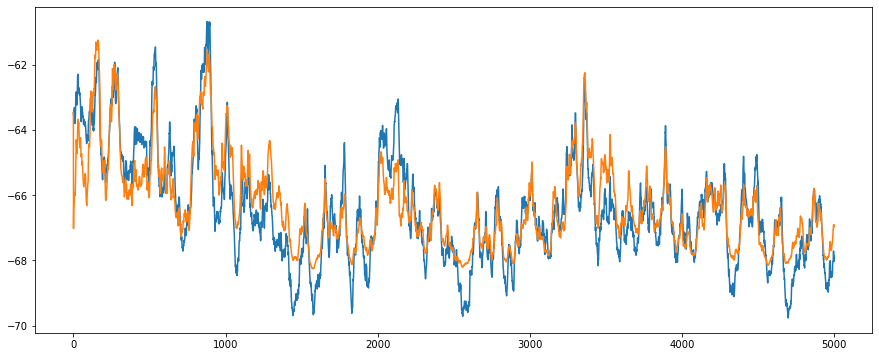

In [7]:
plt.figure(figsize = (15,6))
plt.plot(V[65000:80000][:5000])
plt.plot(test[:5000])

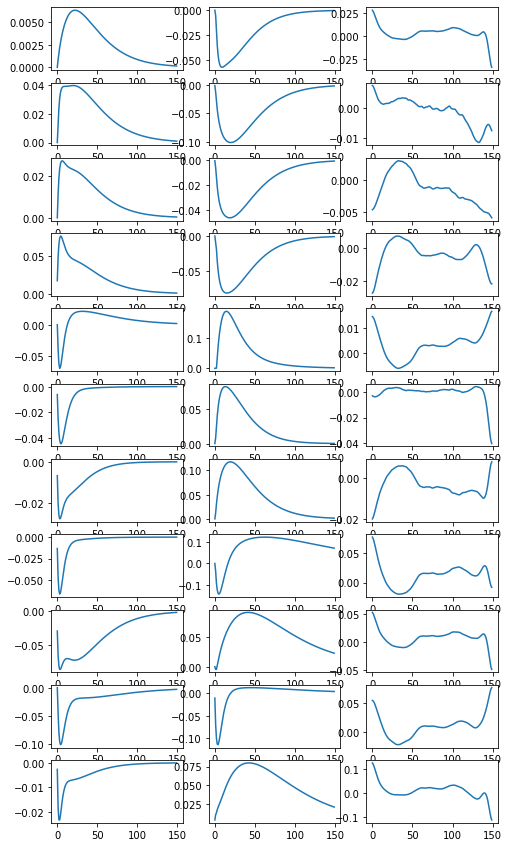

In [8]:
sub_no = 11

fig, axs = plt.subplots(nrows=sub_no, ncols=3, figsize = (8,15))
for i in range(sub_no):
    axs[i,0].plot(filters[i])
    axs[i,1].plot(filters[sub_no+i])
    axs[i,2].plot(filters[sub_no*2+i])